In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
# Import the data
df = pd.read_csv('/content/drive/MyDrive/Data_Tebourbi/Data_cleaned_version.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6900865 entries, 0 to 6900864
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0        int64  
 1   ADDR_PCT_CD       float64
 2   OFNS_DESC         object 
 3   CRM_ATPT_CPTD_CD  object 
 4   LAW_CAT_CD        object 
 5   BORO_NM           object 
 6   PREM_TYP_DESC     object 
 7   Latitude          float64
 8   Longitude         float64
 9   VIC_AGE_GROUP     object 
 10  VIC_RACE          object 
 11  VIC_SEX           object 
 12  year              int64  
 13  month             int64  
 14  day               int64  
 15  hour              int64  
 16  weekday           object 
dtypes: float64(3), int64(5), object(9)
memory usage: 895.0+ MB
None


In [ ]:
del df['Unnamed: 0']

In [ ]:
df

,ADDR_PCT_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year,month,day,hour,weekday
0,81.0,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,BROOKLYN,STREET,40.685041,-73.921777,25-44,WHITE,F,2014,9,4,17,Thursday
1,121.0,GRAND LARCENY,COMPLETED,FELONY,STATEN ISLAND,STREET,40.636991,-74.134093,45-64,WHITE HISPANIC,F,2016,10,12,7,Wednesday
2,41.0,GRAND LARCENY,COMPLETED,FELONY,BRONX,STREET,40.823876,-73.891863,45-64,WHITE HISPANIC,F,2012,9,28,13,Friday
3,46.0,PETIT LARCENY,COMPLETED,MISDEMEANOR,BRONX,STREET,40.845707,-73.910398,<18,WHITE HISPANIC,F,2015,3,24,15,Tuesday
4,109.0,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,QUEENS,STREET,40.763992,-73.828426,25-44,BLACK,M,2017,5,20,4,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6900860,61.0,GRAND LARCENY,COMPLETED,FELONY,BROOKLYN,RESIDENCE - APT. HOUSE,40.583360,-73.951446,25-44,WHITE,F,2013,3,13,12,Wednesday
6900861,28.0,PETIT LARCENY,COMPLETED,MISDEMEANOR,MANHATTAN,COMMERCIAL BUILDING,40.808374,-73.946886,UNKNOWN,UNKNOWN,UNKNOWN,2014,9,12,17,Friday
6900862,70.0,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,BROOKLYN,STREET,40.648648,-73.967731,25-44,BLACK,F,2012,12,20,13,Thursday
6900863,90.0,PETIT LARCENY,COMPLETED,MISDEMEANOR,BROOKLYN,STREET,40.716045,-73.964163,45-64,WHITE,M,2013,4,4,13,Thursday


<BarContainer object of 6 artists>

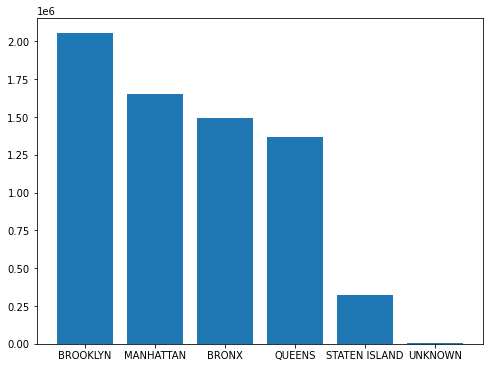

In [ ]:
import matplotlib.pyplot as plt

#Total Number of Crime
plt.figure(figsize=[8,6])
plt.bar(df['BORO_NM'].value_counts().index.tolist(), df['BORO_NM'].value_counts().values)

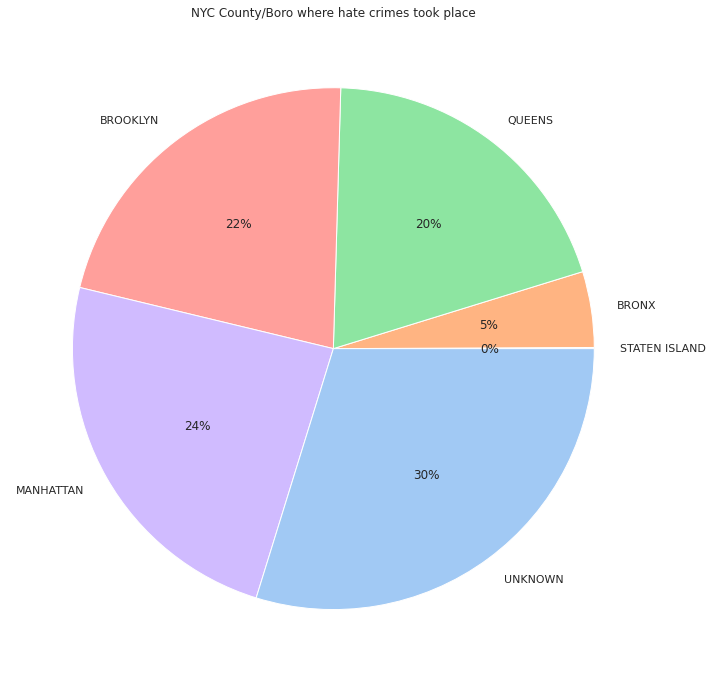

In [ ]:
#/Boro where crimes took place

#define data
data = df['BORO_NM'].value_counts().sort_values()
labels = ['STATEN ISLAND','BRONX', 'QUEENS', 'BROOKLYN', 'MANHATTAN','UNKNOWN']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=[30,12])
#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("NYC County/Boro where hate crimes took place")

plt.show()

LAW_CAT_CD      FELONY  MISDEMEANOR  VIOLATION      All
BORO_NM                                                
BRONX           405201       897118     194202  1496521
BROOKLYN        668115      1120881     266079  2055075
MANHATTAN       524555       950491     180257  1655303
QUEENS          453627       726209     185143  1364979
STATEN ISLAND    71141       190454      62433   324028
UNKNOWN           1558         2821        580     4959
All            2124197      3887974     888694  6900865


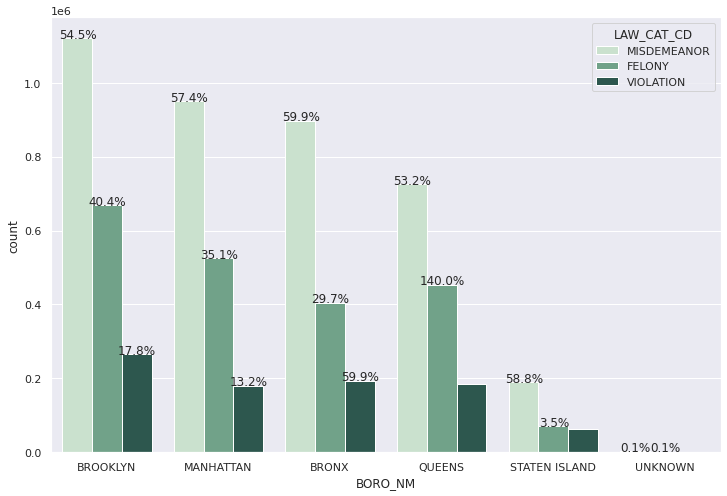

In [ ]:
#  level of crime at each boroughs
import seaborn as sns
sns.set(style="darkgrid")
two_way_table = pd.crosstab(index=df["BORO_NM"], columns=df["LAW_CAT_CD"], margins=True)
print(two_way_table)

boro_name = ['MANHATTAN', 'BROOKLYN', 'QUEENS', 'BRONX', 'STATEN ISLAND']
crime_level = ['VIOLATION', 'MISDEMEANOR', 'FELONY']
subtotal_boro = df.groupby('BORO_NM')['LAW_CAT_CD'].agg('count').sort_values(ascending=False) #total of each boro count
fig = plt.figure(figsize=[12,8])
ax = sns.countplot(x="BORO_NM", hue="LAW_CAT_CD", 
                   data=df[['BORO_NM', 'LAW_CAT_CD']], 
                   order = subtotal_boro.index,
                  palette = "ch:2.5,-.2,dark=.3")

# boro_num = [val for val in range(0, 5) for _ in (0, 1, 2)] #[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4] not work!
boro_num2 = [val for val in range(0, 5)]*3 #[0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,] work for the order
for p, i in zip(ax.patches, boro_num2):
    percent = p.get_height()/subtotal_boro[i]
    ax.annotate('{:.1f}%'. format(percent*100), (p.get_x()+0.138, p.get_height()+300), ha='center', size=12)

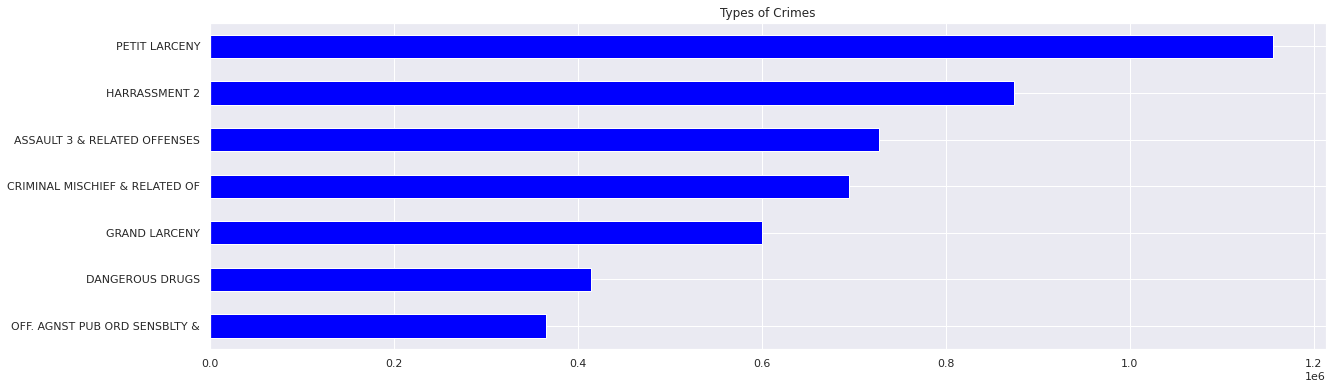

In [ ]:
# visualize the Crime type with its count
plt.figure(figsize=[20,6])
temp_prem = df['OFNS_DESC'].value_counts().head(7).reset_index()
df1 = df.loc[df['OFNS_DESC'].isin(temp_prem['index'])]
df1['OFNS_DESC'].value_counts().sort_values().plot(kind="barh", color = 'blue' , title = "Types of Crimes")

Text(0.5, 1.0, 'Count of Crime by hour of the day')

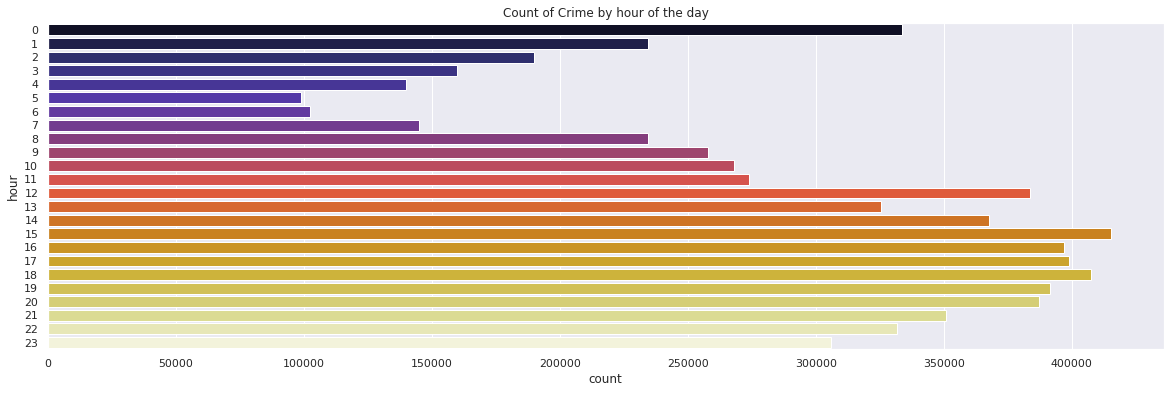

In [ ]:
#Count of Crime by hour of the day
hours = [i for i in range(24)]
plt.figure(figsize=[20,6])
sns.countplot(y='hour', data=df, palette = "CMRmap", order=hours)
plt.title('Count of Crime by hour of the day')

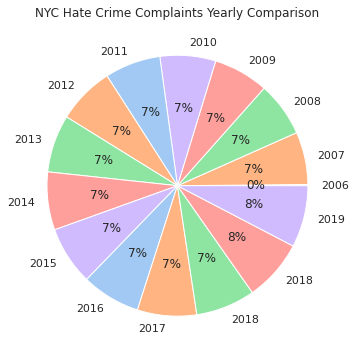

In [ ]:
#Level of crime by year
plt.figure(figsize=[20,6])
temp_year = df['year'].value_counts().head(15).reset_index()
df2 = df.loc[df['year'].isin(temp_year['index'])]
data = df2['year'].value_counts().sort_values()
labels = ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2018','2019']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("NYC Hate Crime Complaints Yearly Comparison")

plt.show()

Text(0.5, 1.0, 'SEX CRIMES')

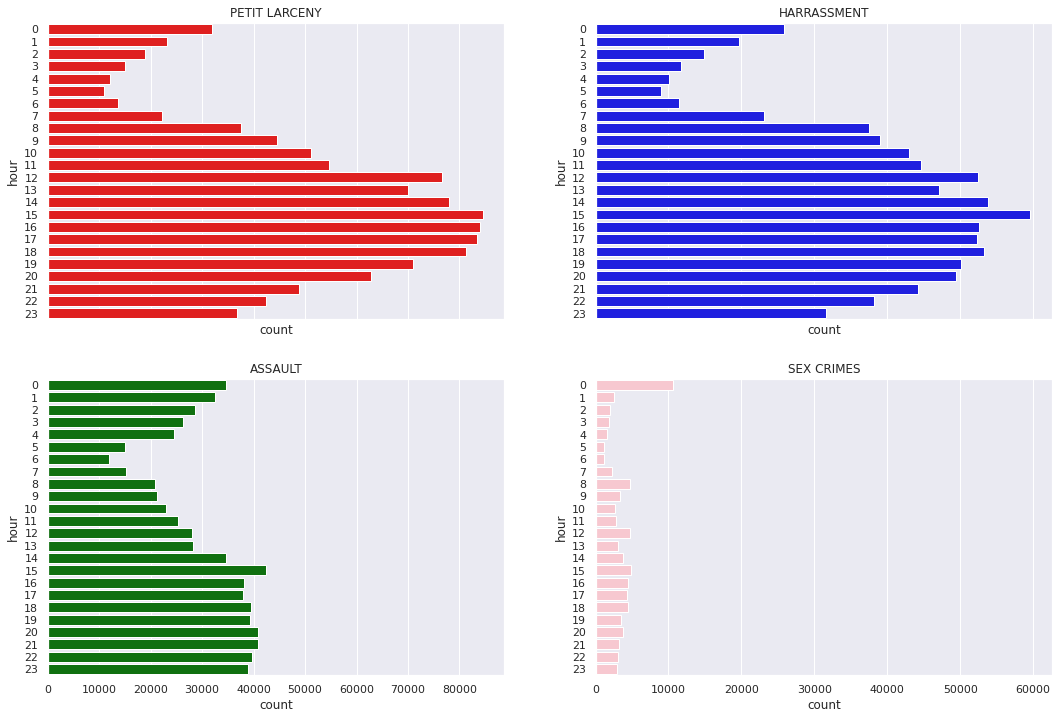

In [ ]:
#Level of Crime by time of each type of crime
f, axes = plt.subplots(2, 2, figsize=(18, 12), sharex='col')


crime_larceny = pd.to_datetime(df[df.OFNS_DESC == 'PETIT LARCENY'].hour)
crime_larceny = pd.DataFrame({'hour':crime_larceny})
sns.countplot(y='hour', data=crime_larceny, color = "red", order=hours, ax=axes[0,0])
axes[0, 0].set_title('PETIT LARCENY')


crime_harrassment = pd.to_datetime(df[df.OFNS_DESC == 'HARRASSMENT 2'].hour)
crime_harrassment = pd.DataFrame({'hour':crime_harrassment})
sns.countplot(y='hour', data=crime_harrassment, color = "blue", order=hours,ax=axes[0,1])
axes[0, 1].set_title('HARRASSMENT')

crime_assault = pd.to_datetime(df[df.OFNS_DESC == 'ASSAULT 3 & RELATED OFFENSES'].hour)
crime_assault = pd.DataFrame({'hour':crime_assault})
sns.countplot(y='hour', data=crime_assault, color = "green", order=hours,ax=axes[1,0])
axes[1, 0].set_title('ASSAULT')

crime_sex = pd.to_datetime(df[df.OFNS_DESC == 'SEX CRIMES'].hour)
crime_sex = pd.DataFrame({'hour':crime_sex})
sns.countplot(y='hour', data=crime_sex, color = "pink", order=hours, ax=axes[1,1])
axes[1, 1].set_title('SEX CRIMES')

Text(0.5, 1.0, 'Crime count by age')

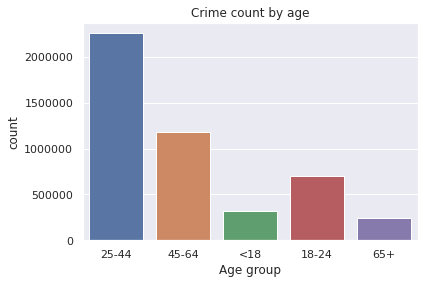

In [ ]:
# Crime level by age
x = df[(df['VIC_AGE_GROUP'] !='UNKNOWN')]
sns.countplot(x=x['VIC_AGE_GROUP'])
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Age group')
plt.ylabel('count')
plt.title('Crime count by age')

Text(0.5, 1.0, 'Crime level by sex')

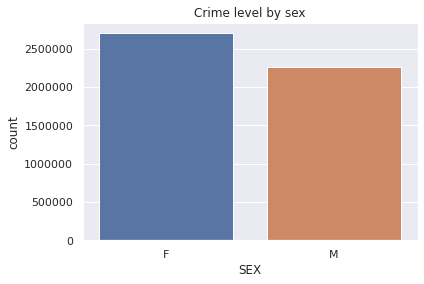

In [ ]:
# Crime level by sex
x = df[(df['VIC_SEX']=='M') | (df['VIC_SEX']=='F')]
sns.countplot(x=x['VIC_SEX'])
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('SEX')
plt.ylabel('count')
plt.title('Crime level by sex')

Text(0.5, 1.0, 'Crime level by race')

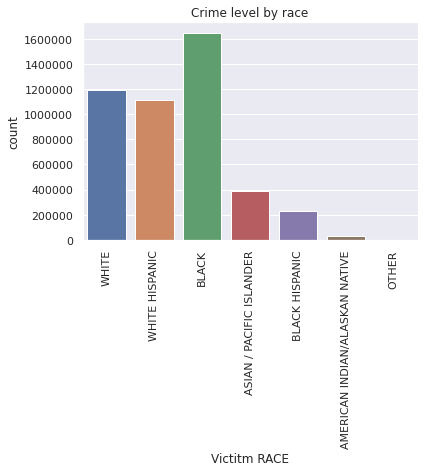

In [ ]:
# Crime level by race
x = df[(df['VIC_RACE']!='UNKNOWN')] # filter only person victims not institutions..
sns.countplot(x=x['VIC_RACE'])
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Victitm RACE')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.title('Crime level by race')

Text(0.5, 1.0, 'Crime evolution')

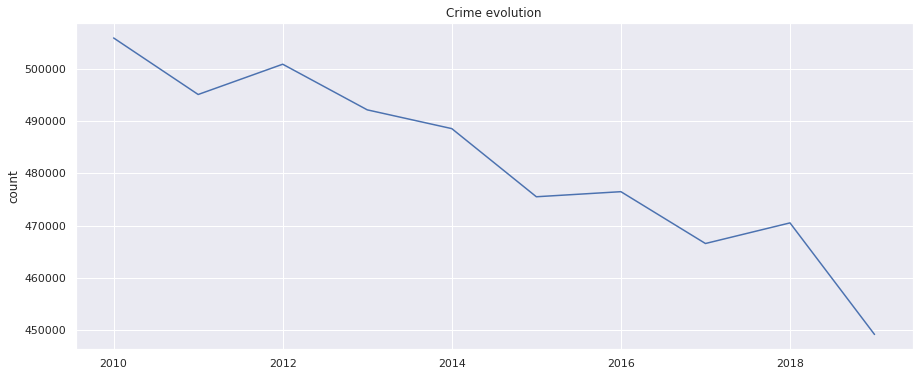

In [ ]:
# Crime level per year
fig= plt.figure(figsize=(15,6))
temp_df = df[df["year"]>=2010]
temp_df.groupby('year').count()['month'].plot(kind='line')
plt.xlabel('')
plt.ylabel('count')
plt.title('Crime evolution')

In [ ]:
import folium
rapes = df[df["OFNS_DESC"] == "RAPE"]
map = folium.Map(location=(40.7128,-74.0060),zoom_start=10)

for each in rapes.iterrows():
    marker = folium.CircleMarker(location=[each[1]['Latitude'],each[1]['Longitude']],
                                          tooltip=each[1]['PREM_TYP_DESC'], radius=3,color='seagreen',
                                          fill_color='emerald')
    marker.add_to(map)
display(map)